# 1. 필요 라이브러리 import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge

# 2. 사용 데이터 확인

In [3]:
df = pd.read_csv("/content/movie_ratings.csv", index_col = 0)
df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   movie_id     100000 non-null  int64 
 2   rating       100000 non-null  int64 
 3   timestamp    100000 non-null  int64 
 4   age          100000 non-null  int64 
 5   gender       100000 non-null  object
 6   occupation   100000 non-null  object
 7   movie_title  100000 non-null  object
 8   unknown      100000 non-null  int64 
 9   Action       100000 non-null  int64 
 10  Adventure    100000 non-null  int64 
 11  Animation    100000 non-null  int64 
 12  Children's   100000 non-null  int64 
 13  Comedy       100000 non-null  int64 
 14  Crime        100000 non-null  int64 
 15  Documentary  100000 non-null  int64 
 16  Drama        100000 non-null  int64 
 17  Fantasy      100000 non-null  int64 
 18  Film-Noir    100000 non-null  int64 
 19  Hor

In [5]:
# 중복값 확인
df.duplicated().sum()

0

In [6]:
# 행당 순서의 열에 있는 값들을 확인하는 함수
def unique_value(col_index) :
    result = df.iloc[:, col_index].unique()
    result.sort()
    print(f"유니크 값의 개수 : {len(result)}")
    print(f"유니크 값들 : {result}")
    return

In [7]:
unique_value(1)

유니크 값의 개수 : 1682
유니크 값들 : [   1    2    3 ... 1680 1681 1682]


In [8]:
# 영화 제목이 unknown인 행 삭제
df = df[df['movie_title'] != 'unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      99991 non-null  int64 
 1   movie_id     99991 non-null  int64 
 2   rating       99991 non-null  int64 
 3   timestamp    99991 non-null  int64 
 4   age          99991 non-null  int64 
 5   gender       99991 non-null  object
 6   occupation   99991 non-null  object
 7   movie_title  99991 non-null  object
 8   unknown      99991 non-null  int64 
 9   Action       99991 non-null  int64 
 10  Adventure    99991 non-null  int64 
 11  Animation    99991 non-null  int64 
 12  Children's   99991 non-null  int64 
 13  Comedy       99991 non-null  int64 
 14  Crime        99991 non-null  int64 
 15  Documentary  99991 non-null  int64 
 16  Drama        99991 non-null  int64 
 17  Fantasy      99991 non-null  int64 
 18  Film-Noir    99991 non-null  int64 
 19  Horror       99991 non-nu

# 3. 데이터 EDA
1. 서브 데이터프레임 생성 
2. 시각화 진행

## 1. 서브 데이터프레임 생성

In [9]:
# 영화ID가 같은 데이터를 제거한 서브 데이터프레임 생성
sub_df = df.drop_duplicates(['movie_id'])
sub_df

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,Kolya (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
117,196,393,4,881251863,49,M,writer,Mrs. Doubtfire (1993),0,0,...,0,0,0,0,0,0,0,0,0,0
309,196,381,4,881251728,49,M,writer,Muriel's Wedding (1994),0,0,...,0,0,0,0,0,1,0,0,0,0
409,196,251,3,881251274,49,M,writer,Shall We Dance? (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
455,196,655,5,881251793,49,M,writer,Stand by Me (1986),0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1679,3,889289491,17,M,student,B. Monkey (1998),0,0,...,0,0,0,0,0,1,0,1,0,0
99996,863,1678,1,889289570,17,M,student,Mat' i syn (1997),0,0,...,0,0,0,0,0,0,0,0,0,0
99997,863,1680,2,889289570,17,M,student,Sliding Doors (1998),0,0,...,0,0,0,0,0,1,0,0,0,0
99998,896,1681,3,887160722,28,M,writer,You So Crazy (1994),0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 장르별 정보를 나타내기 위한 딕셔너리 생성
genre = {
    "genre_name" : [],
    "number_of_movie" : [],
    "ratings_average" : []
}

for index in range(8, 27) :
    genre_name = sub_df.columns[index]
    genre["genre_name"].append(genre_name)
    genre["number_of_movie"].append(len(sub_df[sub_df[genre_name] == 1]))
    genre["ratings_average"].append(df[df[genre_name] == 1].rating.mean().round(2))

# 데이터프레임으로 변경
genre_df = pd.DataFrame({
    'genre_name' : genre["genre_name"],
    'number_of_movie' : genre["number_of_movie"],
    'ratings_average' : genre["ratings_average"]
})
genre_df

,genre_name,number_of_movie,ratings_average
0,unknown,1,1.00
1,Action,251,3.48
2,Adventure,135,3.50
3,Animation,42,3.58
4,Children's,122,3.35
5,Comedy,505,3.39
6,Crime,109,3.63
7,Documentary,50,3.67
8,Drama,725,3.69
9,Fantasy,22,3.22


## 2. 시각화 진행

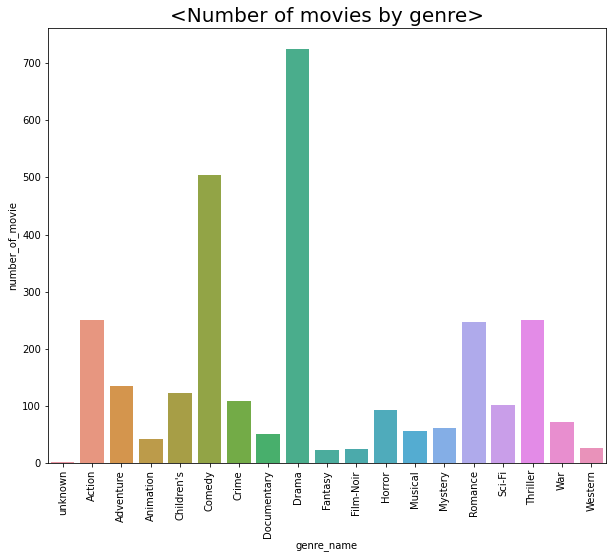

In [11]:
# 장르별 영화 개수 시각화
plt.figure(figsize=(10, 8))
plt.title('<Number of movies by genre>', fontsize=20)
sns.barplot(data= genre_df,x='genre_name', y='number_of_movie')
plt.xticks(rotation=90)
plt.show()

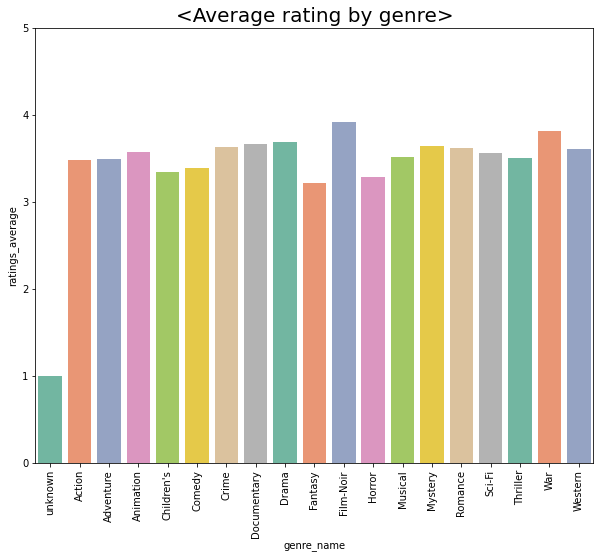

In [12]:
# 장르별 점수 평균 시각화
plt.figure(figsize=(10, 8))
plt.title('<Average rating by genre>', fontsize=20)
plt.ylim(0, 5)
sns.barplot(data= genre_df,x='genre_name', y='ratings_average', palette='Set2')
plt.xticks(rotation=90)
plt.show()

# 4. CB모델링 진행
1. 코사인 유사도 계산
2. 추천 로직 설계
3. 오프라인 성능 평가

## 1. 코사인 유사도 계산

In [13]:
# 영화ID별 영화명과 장르를 나타낸 데이터프레임 생성
movie_df = df.drop_duplicates(['movie_id']).drop(columns=['user_id', 'rating', 'timestamp', 'age', 'gender','occupation']).sort_values('movie_id').reset_index(drop=True)
movie_df

,movie_id,movie_title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 코사인 유사도에 사용할 특성만 추출(CountVectorizer로 된 데이터 활용)
movie_cntvect = movie_df.drop(columns=['movie_id', 'movie_title'])
movie_cntvect

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# 코사인 유사도 계산
movie_similarity = pd.DataFrame(cosine_similarity(movie_cntvect, movie_cntvect), index=movie_df.movie_title, columns=movie_df.movie_title)
movie_similarity

movie_title,Kolya (1996),Mrs. Doubtfire (1993),Muriel's Wedding (1994),Shall We Dance? (1996),Stand by Me (1986),Ace Ventura: Pet Detective (1994),"Mrs. Brown (Her Majesty, Mrs. Brown) (1997)",Raising Arizona (1987),Being There (1979),"Truth About Cats & Dogs, The (1996)",...,Mirage (1995),Mamma Roma (1962),"War at Home, The (1996)","Sunchaser, The (1996)",Sweet Nothing (1995),B. Monkey (1998),Mat' i syn (1997),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
movie_title,,,,,,,,,,,,,,,,,,,,,
Kolya (1996),1.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000
Mrs. Doubtfire (1993),0.000000,1.000000,0.577350,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.816497,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.00000,0.000000
Muriel's Wedding (1994),0.000000,0.577350,1.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.00000,0.000000
Shall We Dance? (1996),0.333333,0.333333,0.000000,1.000000,0.333333,0.577350,0.408248,0.666667,0.577350,0.408248,...,0.408248,0.577350,0.577350,0.577350,0.577350,0.577350,0.000000,0.408248,0.57735,0.577350
Stand by Me (1986),0.000000,0.333333,0.577350,0.333333,1.000000,0.577350,0.408248,0.333333,0.577350,0.408248,...,0.408248,0.577350,0.577350,0.577350,0.577350,0.577350,0.408248,0.408248,0.00000,0.577350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B. Monkey (1998),0.000000,0.000000,0.000000,0.577350,0.577350,1.000000,0.707107,0.577350,1.000000,0.707107,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.707107,0.00000,1.000000
Mat' i syn (1997),0.000000,0.408248,0.707107,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.00000,0.000000
Sliding Doors (1998),0.000000,0.000000,0.000000,0.408248,0.408248,0.707107,0.500000,0.408248,0.707107,0.500000,...,0.000000,0.707107,0.707107,0.707107,0.707107,0.707107,0.500000,1.000000,0.00000,0.707107


## 2. 추천 로직 설계
- 추천 로직
    1. 유저 ID별로 추천 진행
    2. timestamp를 기준으로 평가를 정렬
    3. train, test 데이터를 4:1 비율로 분류
    4. train 데이터의 가장 마지막 timestamp를 기준으로 영화 추천 진행

In [52]:
# 해당 유저id의 데이터를 불러오는 함수
def load_by_user (df, user_id) :
    return df[df['user_id'] == user_id].sort_values('timestamp')

In [81]:
# 테스트를 위한 샘플데이터 생성
sample_data = load_by_user(df, 276)
sample_data.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
17360,276,258,5,874786337,21,M,student,Contact (1997),0,0,...,0,0,0,0,0,0,1,0,0,0
12925,276,300,4,874786338,21,M,student,Air Force One (1997),0,1,...,0,0,0,0,0,0,0,1,0,0
54522,276,328,4,874786366,21,M,student,Conspiracy Theory (1997),0,1,...,0,0,0,0,1,1,0,1,0,0
18902,276,294,4,874786366,21,M,student,Liar Liar (1997),0,0,...,0,0,0,0,0,0,0,0,0,0
10650,276,288,4,874786392,21,M,student,Scream (1996),0,0,...,0,0,1,0,0,0,0,1,0,0


In [82]:
# 학습용 데이터와 테스트용 데이터로 분리하는 함수(비율 = 4:1)
def split_data (df) : # train_test_split모듈 사용시 timestamp값 기준이 아닌 랜덤으로 분리되기 때문에 함수 별도로 작성
    data_len = len(df)
    train_len = round(data_len*0.8)
    train_data = df.iloc[:train_len, :]
    test_data = df.iloc[train_len:, :]
    return train_data, test_data

In [83]:
# 학습용 데이터와 테스트용 데이터 분리
train_data, test_data = split_data(sample_data)
train_data.tail()

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
53934,276,383,2,877934828,21,M,student,"Flintstones, The (1994)",0,0,...,0,0,0,0,0,0,0,0,0,0
78282,276,78,4,877934828,21,M,student,Free Willy (1993),0,0,...,0,0,0,0,0,0,0,0,0,0
16729,276,1083,3,877934891,21,M,student,Albino Alligator (1996),0,0,...,0,0,0,0,0,0,0,1,0,0
16545,276,203,4,877934910,21,M,student,Unforgiven (1992),0,0,...,0,0,0,0,0,0,0,0,0,1
91010,276,1471,2,877934947,21,M,student,Hideaway (1995),0,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
# 학습용 데이터에서 가장 마지막 영화 제목 추출
test_movie = train_data.iloc[-1, :]['movie_title']
test_movie

'Hideaway (1995)'

In [88]:
# 가장 마지막 영화 제목을 기반으로 비슷한 유사도를 가진 영화 10개 추천
sim_movielist = movie_similarity[test_movie].sort_values(ascending=False).reset_index()
recommend_movielist = sim_movielist.drop(index = sim_movielist[sim_movielist['movie_title'] == test_movie].index).reset_index(drop = True)
recommend_movielist[:10]

,movie_title,Hideaway (1995)
0,"Professional, The (1994)",1.0
1,Charade (1963),1.0
2,Love and Other Catastrophes (1996),1.0
3,Mrs. Doubtfire (1993),1.0
4,To Be or Not to Be (1942),1.0
5,"Amityville Horror, The (1979)",1.0
6,"Usual Suspects, The (1995)",1.0
7,Glengarry Glen Ross (1992),1.0
8,Fresh (1994),1.0
9,Days of Thunder (1990),1.0


## 3. 오프라인 평가
- 평가 방식
    1. 유저ID별로 test데이터에 해당하는 영화의 개수만큼 추천
    2. 실제 영화와 추천한 영화를 바탕으로 precision@k 또는 recall@k 계산

In [86]:
# 테스트에 사용할 데이터 확인
test_data

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
87980,276,1210,2,877934988,21,M,student,Virtuosity (1995),0,0,...,0,0,0,0,0,0,1,1,0,0
896,276,238,5,877935060,21,M,student,Raising Arizona (1987),0,0,...,0,0,0,0,0,0,0,0,0,0
50863,276,1095,1,877935135,21,M,student,High School High (1996),0,0,...,0,0,0,0,0,0,0,0,0,0
30470,276,1000,2,877935262,21,M,student,Lightning Jack (1994),0,0,...,0,0,0,0,0,0,0,0,0,1
82320,276,734,1,877935262,21,M,student,Made in America (1993),0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94385,276,916,4,892436298,21,M,student,Lost in Space (1998),0,1,...,0,0,0,0,0,0,1,1,0,0
81976,276,316,4,892436314,21,M,student,As Good As It Gets (1997),0,0,...,0,0,0,0,0,0,0,0,0,0
97639,276,1483,3,892436354,21,M,student,"Man in the Iron Mask, The (1998)",0,1,...,0,0,0,0,0,1,0,0,0,0
94821,276,915,4,892436368,21,M,student,Primary Colors (1998),0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# 20개의 영화 추천
recom_list = recommend_movielist[:20]
recom_list

,movie_title,Hideaway (1995)
0,"Professional, The (1994)",1.000000
1,Charade (1963),1.000000
2,Love and Other Catastrophes (1996),1.000000
3,Mrs. Doubtfire (1993),1.000000
4,To Be or Not to Be (1942),1.000000
5,"Amityville Horror, The (1979)",1.000000
6,"Usual Suspects, The (1995)",1.000000
7,Glengarry Glen Ross (1992),1.000000
8,Fresh (1994),1.000000
9,Days of Thunder (1990),1.000000


In [109]:
# precision@k 계산 함수
def precision_k(test_data, recommend_movielist) : 
    movietitle_list = recommend_movielist['movie_title'].to_list()
    common_movie = test_data[test_data['movie_title'].isin(movietitle_list)]

    return len(common_movie) / len(recommend_movielist)

# recall@k 계산 함수 -> 개선해야 할듯
def recall_k(test_data, recommend_movielist) : 
    movietitle_list = recommend_movielist['movie_title'].to_list()
    common_movie = test_data[test_data['movie_title'].isin(movietitle_list)]

    return len(common_movie) / len(test_data)

In [106]:
precision_k(test_data, recom_list)

0.05

In [108]:
recall_k(test_data, recom_list)

0.009615384615384616

# 5. 머신러닝 진행 -> 후에 보완 진행
1. 학습 데이터와 테스트 데이터 분리
2. 기준모델 생성
3. 모델 생성

## 1. 학습 데이터와 테스트 데이터 분리

In [16]:
# 특성과 타겟 구분
target = 'rating'
features = df.drop(columns=[target]).columns

# 학습데이터와 테스트 데이터 분리
train_set, test_set = train_test_split(df, test_size=0.2, shuffle=True, random_state=3)

X_test = test_set[features]
y_test = test_set[target]

In [17]:
# 학습 데이터와 검증 데이터 분리
train_set, valid_set = train_test_split(train_set, test_size=0.2, random_state=3)

X_val = valid_set[features]
y_val = valid_set[target]

X_train = train_set[features]
y_train = train_set[target]

In [18]:
test_set.drop_duplicates(['movie_id'])

,user_id,movie_id,rating,timestamp,age,gender,occupation,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
24623,162,230,2,877636860,25,M,artist,Star Trek IV: The Voyage Home (1986),0,1,...,0,0,0,0,0,0,1,0,0,0
72168,634,690,3,877368446,39,M,engineer,Seven Years in Tibet (1997),0,0,...,0,0,0,0,0,0,0,0,1,0
91441,94,823,3,891722458,26,M,student,Mulholland Falls (1996),0,0,...,0,1,0,0,0,0,0,1,0,0
81392,194,737,4,879553003,38,M,administrator,Sirens (1994),0,0,...,0,0,0,0,0,0,0,0,0,0
73012,90,709,5,891383752,60,M,educator,Strictly Ballroom (1992),0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96045,662,1342,4,880570112,55,M,librarian,"Convent, The (Convento, O) (1995)",0,0,...,0,0,0,0,0,0,0,0,0,0
80988,286,1504,4,877534903,27,M,student,"Bewegte Mann, Der (1994)",0,0,...,0,0,0,0,0,0,0,0,0,0
94820,299,915,4,892250102,29,M,doctor,Primary Colors (1998),0,0,...,0,0,0,0,0,0,0,0,0,0
93555,181,1369,1,878962199,26,M,executive,"Forbidden Christ, The (Cristo proibito, Il) (1...",0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. 기준 모델 생성(최빈값)

In [19]:
# 최빈값으로 기준모델 생성
base = y_val.mode()[0] 
baseline = len(y_val) * [base]

In [20]:
# 기준모델 평가
baseline_mae = mean_absolute_error(y_val, baseline)
baseline_mse = mean_squared_error(y_val, baseline)
baseline_rmse = np.sqrt(baseline_mse)

print('기준모델의 MAE :', baseline_mae)
print('기준모델의 RMSE :', baseline_rmse)

기준모델의 MAE : 0.8955559722482656
기준모델의 RMSE : 1.2192591652544604


## 3. 모델 생성
1. 샘플데이터로 단계별 진행
2. 모듈화 및 전체 데이터 테스트

### 3-1. 샘플데이터로 단계별 진행

In [21]:
# 유저 id별로 평가 개수 확인 -> 평가 개수가 적은 유저 id는 제거하기 위해
df['user_id'].value_counts()

405    737
655    685
13     636
450    540
276    518
      ... 
36      20
418     20
147     20
34      20
571     20
Name: user_id, Length: 943, dtype: int64

In [40]:
# 유저 id별로 훈련, 검증, 테스트 데이터를 분리하는 함수
def split_df(df, user_id) :
    df_sample = df[df['user_id'] == user_id]
    target = 'rating'
    features = df_sample.drop(columns=['user_id', 'rating', 'timestamp', 'age', 'gender','occupation', 'movie_title']).columns

    # 테스트 데이터 분리
    train_set, test_set = train_test_split(df_sample, test_size=0.2, shuffle=True, random_state=3)
    X_test = test_set[features]
    y_test = test_set[target]

    # 훈련, 검증 데이터 분리
    train_set, valid_set = train_test_split(train_set, test_size=0.2, random_state=3)
    X_val = valid_set[features]
    y_val = valid_set[target]
    X_train = train_set[features]
    y_train = train_set[target]
    
    return X_test, y_test, X_val, y_val, X_train, y_train

In [23]:
# 학습 모델을 생성하는 함수
def train_model(X_train, y_train, model=Ridge()):
    model.fit(X_train, y_train)
    return model

# 예측을 진행하는 함수
def predict_rating(X, model):
    preds = model.predict(X)
    return preds

In [24]:
# 모델 테스트를 위한 샘플 데이터 생성
X_test, y_test, X_val, y_val, X_train, y_train = split_df(df, 276)

In [25]:
# 모델 생성 및 평점 예측
model = train_model(X_train, y_train)
preds = predict_rating(X_val, model)

# 평가 진행
model_val_mae = mean_absolute_error(y_val, preds)
model_val_mse = mean_squared_error(y_val, preds)
model_val_rmse = np.sqrt(model_val_mse)

print('생성 모델의 검증데이터 MAE :', model_val_mae)
print('생성 모델의 검증데이터 RMSE :', model_val_rmse)

생성 모델의 검증데이터 MAE : 0.7392088658845007
생성 모델의 검증데이터 RMSE : 0.9322491412432514


In [26]:
# 테스트 데이터로 평점 예측
preds = predict_rating(X_test, model)

# 평가 진행
model_test_mae = mean_absolute_error(y_test, preds)
model_test_mse = mean_squared_error(y_test, preds)
model_test_rmse = np.sqrt(model_test_mse)

print('생성 모델의 테스트데이터 MAE :', model_test_mae)
print('생성 모델의 테스트데이터 RMSE :', model_test_rmse)

생성 모델의 테스트데이터 MAE : 0.7289859967515336
생성 모델의 테스트데이터 RMSE : 0.9245720716692877


In [27]:
# 영화별 정보가 담긴 데이터프레임 생성
movie_df = df.drop_duplicates(['movie_id'])
movie_inform_df = movie_df.drop(columns=['user_id', 'rating', 'timestamp', 'age', 'gender', 'occupation'])
movie_inform_df

,movie_id,movie_title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,242,Kolya (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
117,393,Mrs. Doubtfire (1993),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
309,381,Muriel's Wedding (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
409,251,Shall We Dance? (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
455,655,Stand by Me (1986),0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
99996,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99998,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
moive_list_trained = X_train['movie_id'].to_list() # 학습에 사용한 영화 리스트
moive_list_not_trained = movie_inform_df[~movie_inform_df['movie_id'].isin(moive_list_trained)] # 학습에 사용하지 않은 영화 리스트
movie_features = moive_list_not_trained.drop(columns=['movie_title']) # 학습에 사용할 특성 추출
movie_features

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,242,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
309,381,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
409,251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
785,306,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1137,663,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
99996,1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99997,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
99998,1681,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# 영화별 예측 평점을 데이터프레임으로 생성
preds = predict_rating(movie_features, model)
predict_ratings = pd.DataFrame({'movie_id' : moive_list_not_trained['movie_id'],
              'movie_title' : moive_list_not_trained['movie_title'],
              'predict_rating' : preds})

# 예측 평정 상위 5개를 출력
predict_ratings.sort_values('predict_rating', ascending=False).head()

,movie_id,movie_title,predict_rating
13342,299,Hoodlum (1997),4.636426
31757,89,Blade Runner (1982),4.599908
45016,32,Crumb (1994),4.484124
66503,48,Hoop Dreams (1994),4.467322
98947,75,Brother Minister: The Assassination of Malcolm...,4.438967


### 3-2. 모듈화 및 전체 데이터 테스트

In [30]:
# 영화를 추천하는 함수
def recommend_movie (user_id, recommend_num) : 
    '''
    user_id : 추천을 받고싶은 유저의 ID
    recommend_num : 추천받을 영화의 개수
    '''

    # 데이터 분리
    X_test, y_test, X_val, y_val, X_train, y_train = split_df(df, user_id)

    # 모델 생성
    model = train_model(X_train, y_train)

    # 검증데이터 평가
    preds = predict_rating(X_val, model)
    model_val_mae = mean_absolute_error(y_val, preds)
    model_val_mse = mean_squared_error(y_val, preds)
    model_val_rmse = np.sqrt(model_val_mse)
    print('---검증데이터 평가내용---')
    print('생성 모델의 MAE :', model_val_mae)
    print('생성 모델의 RMSE :', model_val_rmse)

    # 테스트데이터 평가
    preds = predict_rating(X_test, model)
    model_test_mae = mean_absolute_error(y_test, preds)
    model_test_mse = mean_squared_error(y_test, preds)
    model_test_rmse = np.sqrt(model_test_mse)
    print('---테스트데이터 평가내용---')
    print('생성 모델의 MAE :', model_test_mae)
    print('생성 모델의 RMSE :', model_test_rmse)

    # 영화별 정보가 담긴 데이터프레임 생성
    movie_df = df.drop_duplicates(['movie_id'])
    movie_inform_df = movie_df.drop(columns=['user_id', 'rating', 'timestamp', 'age', 'gender', 'occupation'])

    # 학습에 사용하지 않은 데이터 추출
    moive_list_trained = X_train['movie_id'].to_list() 
    moive_list_not_trained = movie_inform_df[~movie_inform_df['movie_id'].isin(moive_list_trained)]
    movie_features = moive_list_not_trained.drop(columns=['movie_title'])

    # 영화별 예측 평점을 데이터프레임으로 생성
    preds = predict_rating(movie_features, model)
    predict_ratings = pd.DataFrame({'movie_id' : moive_list_not_trained['movie_id'],
                                    'movie_title' : moive_list_not_trained['movie_title'],
                                    'predict_rating' : preds})

    # 예측 평정 상위 n개를 리턴
    predict_ratings_n = predict_ratings.sort_values('predict_rating', ascending=False).head(recommend_num)
    
    return predict_ratings_n[['movie_id', 'movie_title']]

In [31]:
# 전체 데이터로 테스트 진행
recommend_movie(276, 5)

---검증데이터 평가내용---
생성 모델의 MAE : 0.7392088658845007
생성 모델의 RMSE : 0.9322491412432514
---테스트데이터 평가내용---
생성 모델의 MAE : 0.7289859967515336
생성 모델의 RMSE : 0.9245720716692877


,movie_id,movie_title
13342,299,Hoodlum (1997)
31757,89,Blade Runner (1982)
45016,32,Crumb (1994)
66503,48,Hoop Dreams (1994)
98947,75,Brother Minister: The Assassination of Malcolm...
